In [2]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
# 정규식
import re

In [3]:
# 날씨 csv 파일 로드
weather_df = pd.read_csv('data/weather_month_2016_2022.csv', encoding='cp949')
weather_df

,지점,지점명,일시,평균기온(°C),평균상대습도(%),월합강수량(00~24h만)(mm),일최다강수량 나타난날(yyyymmdd),평균운량(1/10),합계 일사량(MJ/m2),최심신적설(cm)
0,156,광주,2016-01,0.9,69,49.7,20160128,6.0,244.83,13.5
1,156,광주,2016-02,3.3,60,45.2,20160212,4.5,348.22,5.6
2,156,광주,2016-03,8.4,60,55.2,20160305,4.1,520.95,NaN
3,156,광주,2016-04,15.5,66,185.0,20160427,5.8,541.64,NaN
4,156,광주,2016-05,19.8,65,104.5,20160510,5.2,681.60,NaN
...,...,...,...,...,...,...,...,...,...,...
79,156,광주,2022-08,26.9,90,106.4,20220820,7.3,454.30,NaN
80,156,광주,2022-09,23.1,77,89.2,20220905,6.2,483.16,NaN
81,156,광주,2022-10,16.0,65,38.3,20221004,4.0,459.57,NaN
82,156,광주,2022-11,11.8,62,46.7,20221112,3.9,336.75,NaN


In [4]:
# 필요없는 '지점', '지점명' column 삭제
weather_df.drop(columns='지점', inplace=True)

In [5]:
weather_df.drop(columns='지점명', inplace=True)

In [6]:
# 결측치 교체(nan -> 0)
weather_df = weather_df.fillna(0)

In [7]:
# column 이름 변경
weather_df = weather_df.rename(columns = {'일시' : 'date',
                             '평균기온(°C)' : 'temp',
                             '평균상대습도(%)' : 'Humidity_mean',
                             '월합강수량(00~24h만)(mm)' : 'rainfall_total',
                             '일최다강수량 나타난날(yyyymmdd)' : 'rainfall_date',
                             '평균운량(1/10)' : 'cloud',
                             '합계 일사량(MJ/m2)' : 'solar',
                             '최심신적설(cm)' : 'snow'})

In [8]:
# 필요없는 일최다강수량 나타난날(yyyymmdd) 삭제
weather_df.drop(columns='rainfall_date', inplace=True)

In [9]:
# DataFrame 정보 확인
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            84 non-null     object 
 1   temp            84 non-null     float64
 2   Humidity_mean   84 non-null     int64  
 3   rainfall_total  84 non-null     float64
 4   cloud           84 non-null     float64
 5   solar           84 non-null     float64
 6   snow            84 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 4.7+ KB


In [10]:
# object 칼럼 date -> year(년), month(월) 로 나누고 칼럼추가
weather_df['year'] = weather_df['date'].apply(
    lambda x: int(re.findall('\d+',x.split('-')[0])[0]) if pd.notnull(x) else x)

weather_df['month'] = weather_df['date'].apply(
    lambda x: int(re.findall('\d+',x.split('-')[1])[0]) if pd.notnull(x) else x)

In [11]:
weather_df

,date,temp,Humidity_mean,rainfall_total,cloud,solar,snow,year,month
0,2016-01,0.9,69,49.7,6.0,244.83,13.5,2016,1
1,2016-02,3.3,60,45.2,4.5,348.22,5.6,2016,2
2,2016-03,8.4,60,55.2,4.1,520.95,0.0,2016,3
3,2016-04,15.5,66,185.0,5.8,541.64,0.0,2016,4
4,2016-05,19.8,65,104.5,5.2,681.60,0.0,2016,5
...,...,...,...,...,...,...,...,...,...
79,2022-08,26.9,90,106.4,7.3,454.30,0.0,2022,8
80,2022-09,23.1,77,89.2,6.2,483.16,0.0,2022,9
81,2022-10,16.0,65,38.3,4.0,459.57,0.0,2022,10
82,2022-11,11.8,62,46.7,3.9,336.75,0.0,2022,11


In [12]:
# 결측치 확인
weather_df.isnull().sum()

date              0
temp              0
Humidity_mean     0
rainfall_total    0
cloud             0
solar             0
snow              0
year              0
month             0
dtype: int64

In [13]:
# date 칼럼 삭제
weather_df.drop(columns='date', inplace=True)

In [14]:
weather_df

,temp,Humidity_mean,rainfall_total,cloud,solar,snow,year,month
0,0.9,69,49.7,6.0,244.83,13.5,2016,1
1,3.3,60,45.2,4.5,348.22,5.6,2016,2
2,8.4,60,55.2,4.1,520.95,0.0,2016,3
3,15.5,66,185.0,5.8,541.64,0.0,2016,4
4,19.8,65,104.5,5.2,681.60,0.0,2016,5
...,...,...,...,...,...,...,...,...
79,26.9,90,106.4,7.3,454.30,0.0,2022,8
80,23.1,77,89.2,6.2,483.16,0.0,2022,9
81,16.0,65,38.3,4.0,459.57,0.0,2022,10
82,11.8,62,46.7,3.9,336.75,0.0,2022,11


In [15]:
# 칼럼명 순서 리스트로 변환
cols = list(weather_df.columns)
cols

['temp',
 'Humidity_mean',
 'rainfall_total',
 'cloud',
 'solar',
 'snow',
 'year',
 'month']

In [16]:
# 칼럼명 리스트로 칼럼 순서 변경
weather_df = weather_df[cols[6:] + cols[:6]]
weather_df

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow
0,2016,1,0.9,69,49.7,6.0,244.83,13.5
1,2016,2,3.3,60,45.2,4.5,348.22,5.6
2,2016,3,8.4,60,55.2,4.1,520.95,0.0
3,2016,4,15.5,66,185.0,5.8,541.64,0.0
4,2016,5,19.8,65,104.5,5.2,681.60,0.0
...,...,...,...,...,...,...,...,...
79,2022,8,26.9,90,106.4,7.3,454.30,0.0
80,2022,9,23.1,77,89.2,6.2,483.16,0.0
81,2022,10,16.0,65,38.3,4.0,459.57,0.0
82,2022,11,11.8,62,46.7,3.9,336.75,0.0


In [17]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            84 non-null     int64  
 1   month           84 non-null     int64  
 2   temp            84 non-null     float64
 3   Humidity_mean   84 non-null     int64  
 4   rainfall_total  84 non-null     float64
 5   cloud           84 non-null     float64
 6   solar           84 non-null     float64
 7   snow            84 non-null     float64
dtypes: float64(5), int64(3)
memory usage: 5.4 KB


In [18]:
# 예를 들어 2020년도 이후 데이터가 필요할시 이런식으로 검색하여 사용
weather_df.query("year >= 2020")

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow
48,2020,1,4.6,68,74.9,6.3,264.36,0.0
49,2020,2,5.3,67,47.8,4.9,346.78,10.9
50,2020,3,9.0,58,43.5,4.0,568.48,0.0
51,2020,4,11.5,52,55.3,3.3,686.90,0.0
52,2020,5,18.8,73,96.8,6.1,619.38,0.0
53,2020,6,23.6,79,199.9,6.5,592.22,0.0
54,2020,7,23.4,91,533.3,8.7,394.45,0.0
55,2020,8,27.6,89,738.1,6.6,501.73,0.0
56,2020,9,21.3,85,178.3,6.3,441.01,0.0
57,2020,10,15.7,64,12.1,4.6,477.99,0.0


In [19]:
# csv 파일로 변환하여 저장하는 코드
# weather_df.to_csv("data/weather_df.csv")

In [20]:
# 데이터 기초통계량 확인
weather_df.describe()

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,2019.000000,6.500000,14.753571,70.428571,107.540476,5.344048,462.748333,1.809524
std,2.012012,3.472786,8.933320,10.019602,117.916294,1.069777,133.913445,4.945209
min,2016.000000,1.000000,-0.200000,52.000000,0.300000,3.300000,241.720000,0.000000
25%,2017.000000,3.750000,6.875000,62.000000,33.725000,4.600000,343.127500,0.000000
50%,2019.000000,6.500000,15.500000,68.500000,76.850000,5.100000,460.300000,0.000000
75%,2021.000000,9.250000,23.000000,79.000000,131.250000,6.125000,570.310000,0.000000
max,2022.000000,12.000000,28.400000,91.000000,738.100000,8.700000,770.490000,32.900000


<AxesSubplot:xlabel='month', ylabel='temp'>

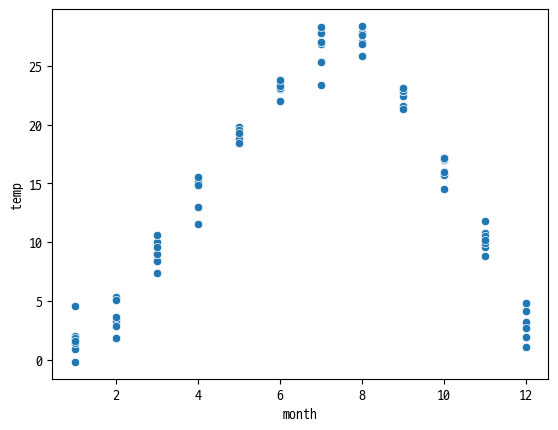

In [23]:
# 데이터 시각화
sns.scatterplot(data = weather_df, x = 'month', y = 'temp')